In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
new_cols = [col.replace(' ','_').replace('/','_') for col in df.columns]
new_cols

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [40]:
df.columns = new_cols

In [41]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.shape

(1000, 8)

### Checking for Null values

In [43]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Datatypes of each features

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [45]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Dataset stats

In [46]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Categories of each feature

In [47]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [48]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'We have {len(numerical_features)} Numerical features: {numerical_features}')
print(f'We have {len(categorical_features)} Numerical features: {categorical_features}')

We have 3 Numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 Numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"


In [49]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total_score']/3,3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333


In [50]:
len(df[df['math_score']==100])

7

In [51]:
print(f"Number of student with Full marks in Math: {len(df[df['math_score']==100])}")
print(f"Number of student with Full marks in Math: {len(df[df['reading_score']==100])}")
print(f"Number of student with Full marks in Math: {len(df[df['writing_score']==100])}")
print('\n')
print(f"Percentage of student with Full marks in Math: {round(len(df[df['math_score']==100])/len(df['math_score'])*100,3)}%")
print(f"Percentage of student with Full marks in Math: {round(len(df[df['reading_score']==100])/len(df['reading_score'])*100,3)}%")
print(f"Percentage of student with Full marks in Math: {round(len(df[df['writing_score']==100])/len(df['writing_score'])*100,3)}%")

Number of student with Full marks in Math: 7
Number of student with Full marks in Math: 17
Number of student with Full marks in Math: 14


Percentage of student with Full marks in Math: 0.7%
Percentage of student with Full marks in Math: 1.7%
Percentage of student with Full marks in Math: 1.4%


### Looking at worst performances

In [52]:
len(df[df['math_score'] < 35])

22

In [53]:
print(f"Number of students who have failed in Maths: {len(df[df['math_score'] < 35])}")
print(f"Number of students who have failed in Reading: {len(df[df['reading_score'] < 35])}")
print(f"Number of students who have failed in Writing: {len(df[df['writing_score'] < 35])}")

Number of students who have failed in Maths: 22
Number of students who have failed in Reading: 15
Number of students who have failed in Writing: 17


In [54]:
male_df = df[df['gender'] == 'male']
female_df = df[df['gender'] == 'female']

In [55]:
len(male_df[male_df['math_score'] < 35])

4

In [56]:
male_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333
7,male,group B,some college,free/reduced,none,40,43,39,122,40.667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.667


In [57]:
print(f"Number of Male students who have failed in Maths: {len(male_df[male_df['math_score'] < 35])}")
print(f"Number of Male students who have failed in Reading: {len(male_df[male_df['reading_score'] < 35])}")
print(f"Number of Male students who have failed in Writing: {len(male_df[male_df['writing_score'] < 35])}")

Number of Male students who have failed in Maths: 4
Number of Male students who have failed in Reading: 8
Number of Male students who have failed in Writing: 8


In [58]:
print(f"Number of Female students who have failed in Maths: {len(female_df[female_df['math_score'] < 35])}")
print(f"Number of Female students who have failed in Reading: {len(female_df[female_df['reading_score'] < 35])}")
print(f"Number of Female students who have failed in Writing: {len(female_df[female_df['writing_score'] < 35])}")

Number of Female students who have failed in Maths: 18
Number of Female students who have failed in Reading: 7
Number of Female students who have failed in Writing: 9


Insights:
- Students have performed bad in Maths compared to the other two. 
- Female students seem to have performed worse than their male counterparts across all

## Exploring Data ( Visualization )

<Axes: xlabel='average', ylabel='Count'>

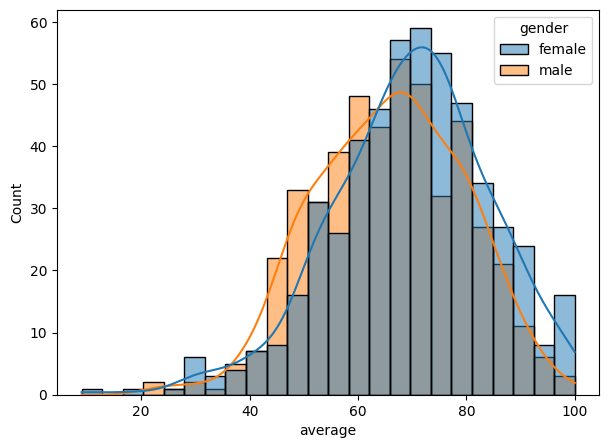

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(df, x='average', hue='gender', kde = True)

<Axes: xlabel='total_score', ylabel='Count'>

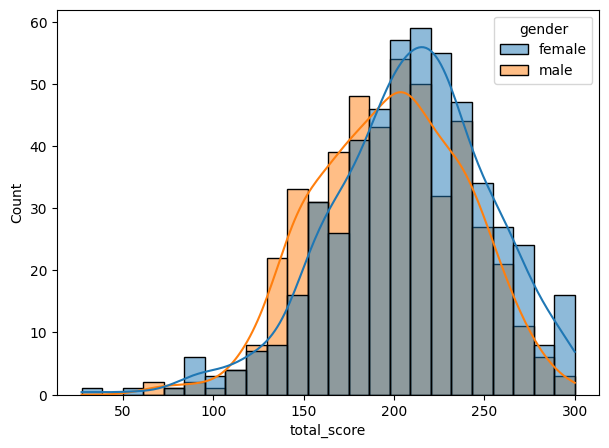

In [60]:
plt.figure(figsize=(7,5))
sns.histplot(df, x='total_score', hue='gender', kde = True)

<Axes: xlabel='total_score', ylabel='Count'>

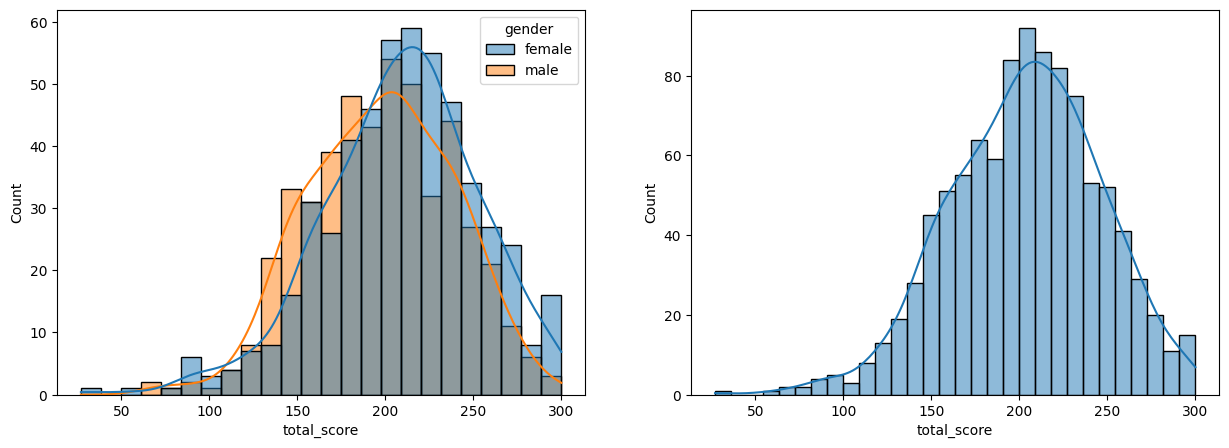

In [61]:
plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121)
sns.histplot(df, x='total_score', hue='gender', kde = True)
plt.subplot(122)
sns.histplot(df, x='total_score', bins = 30, kde = True)

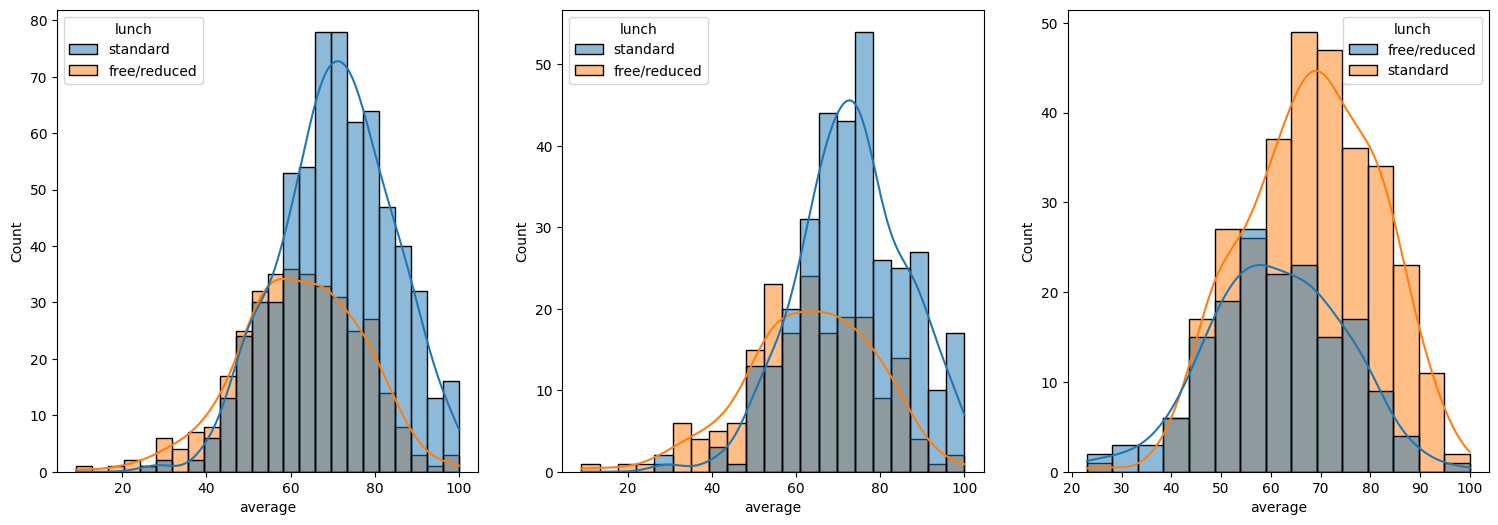

In [62]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

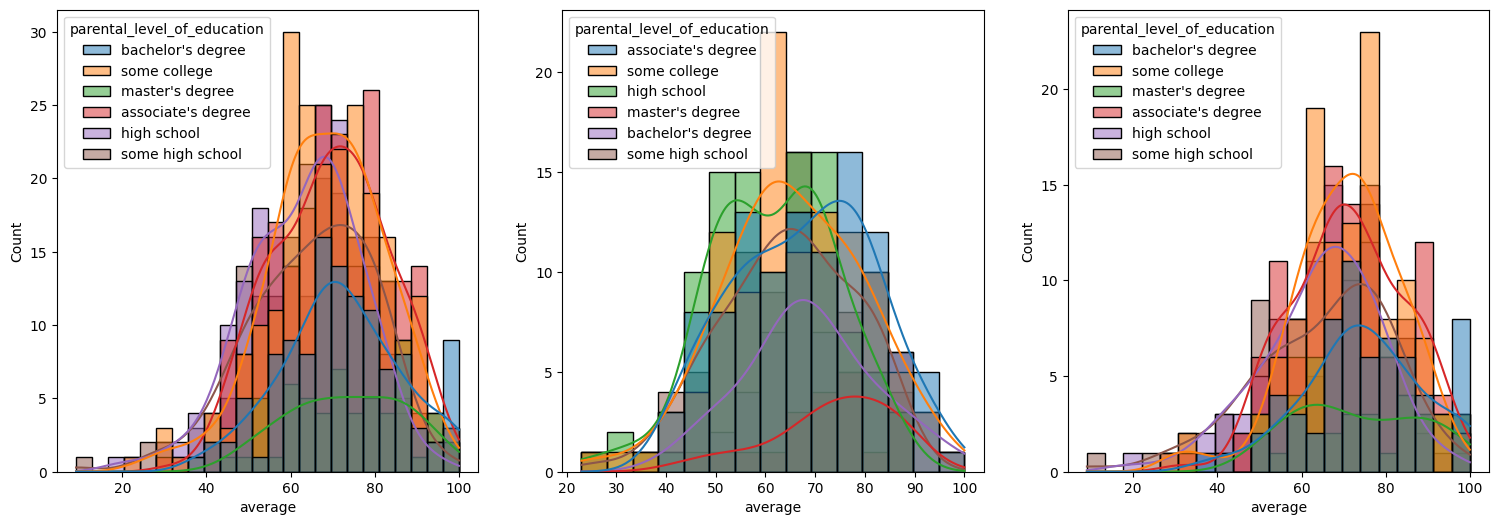

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
- Both Male and Female Parental level of education are less likely to have Masters degree


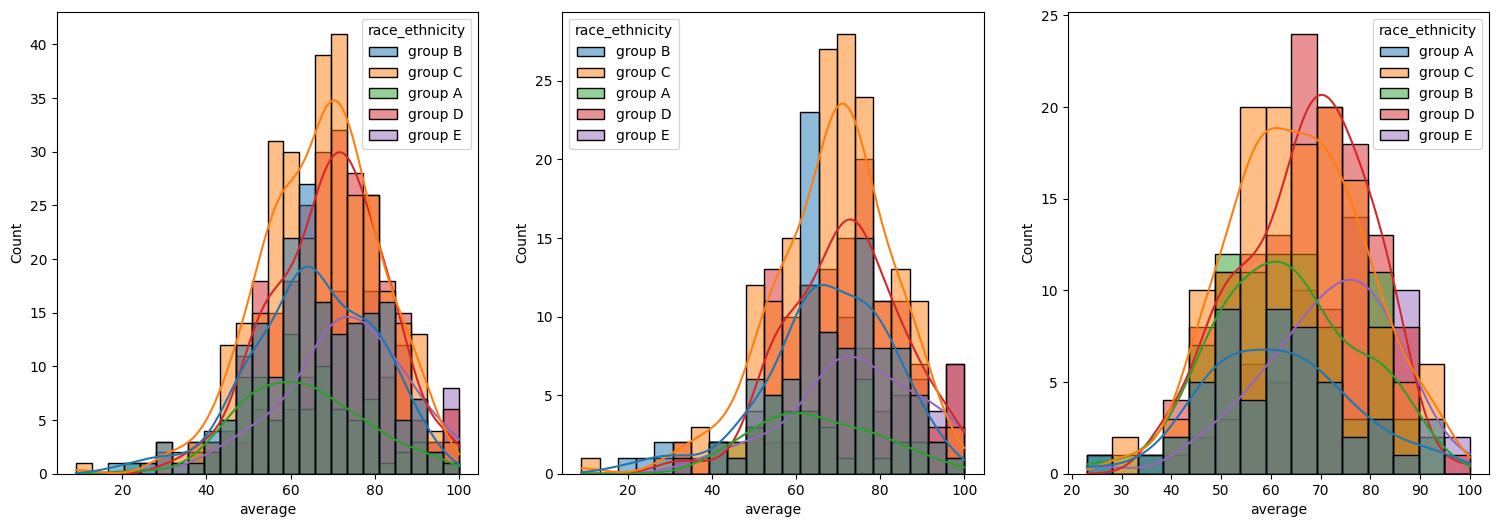

In [64]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students from group A and B tend to perform poorly

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

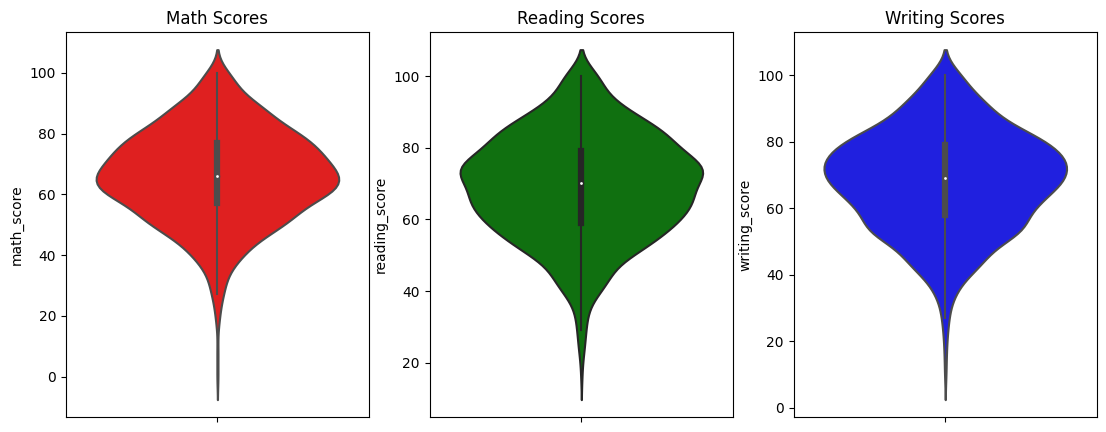

In [65]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(df, y = 'math_score', color = 'red')

plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(df, y = 'reading_score', color = 'green')

plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(df, y = 'writing_score', color = 'blue')

Insights:
- We can see that most students score between 60-80

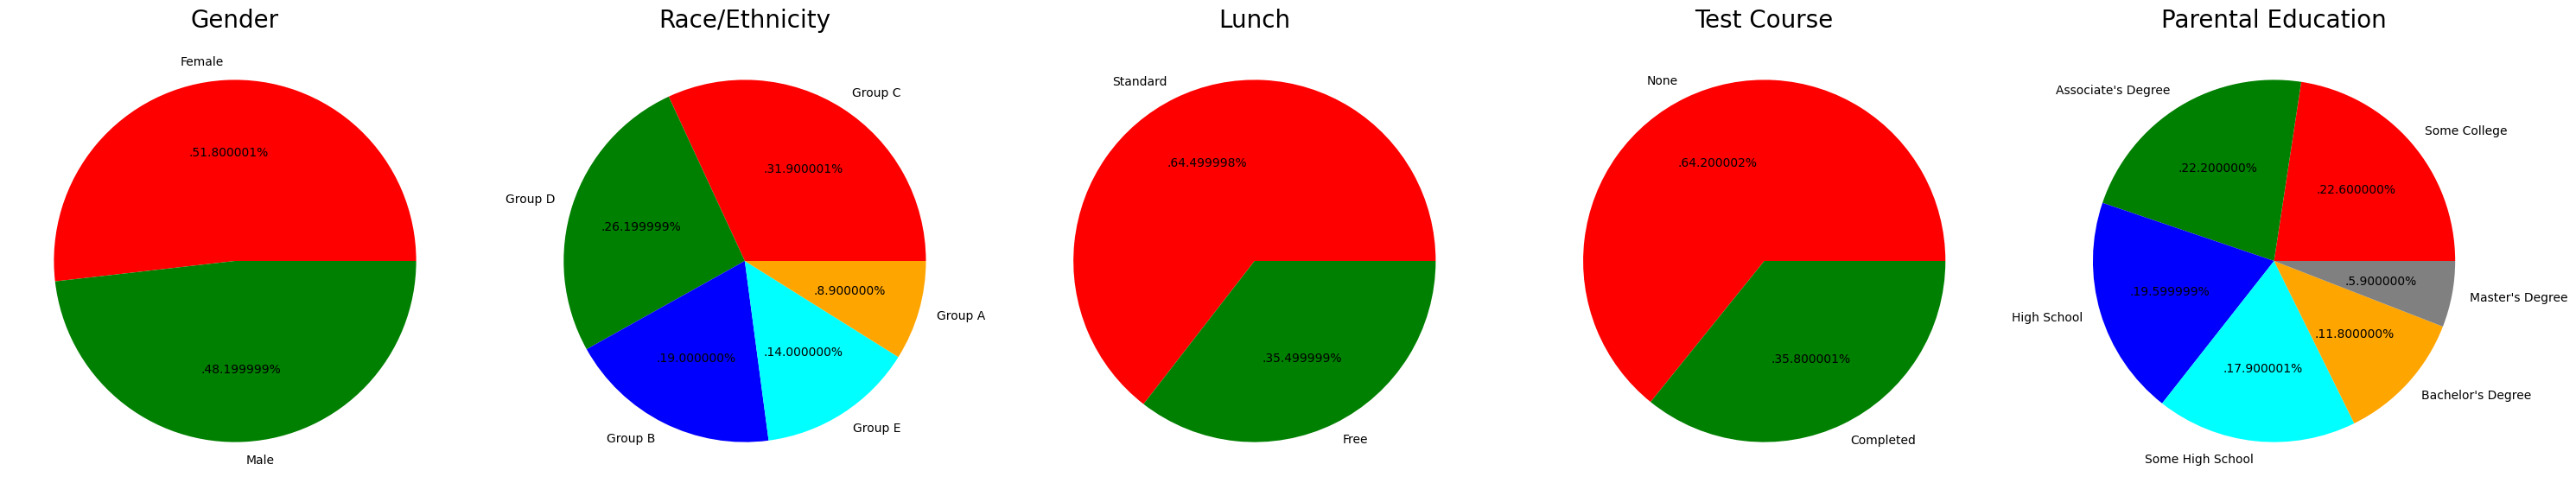

In [66]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

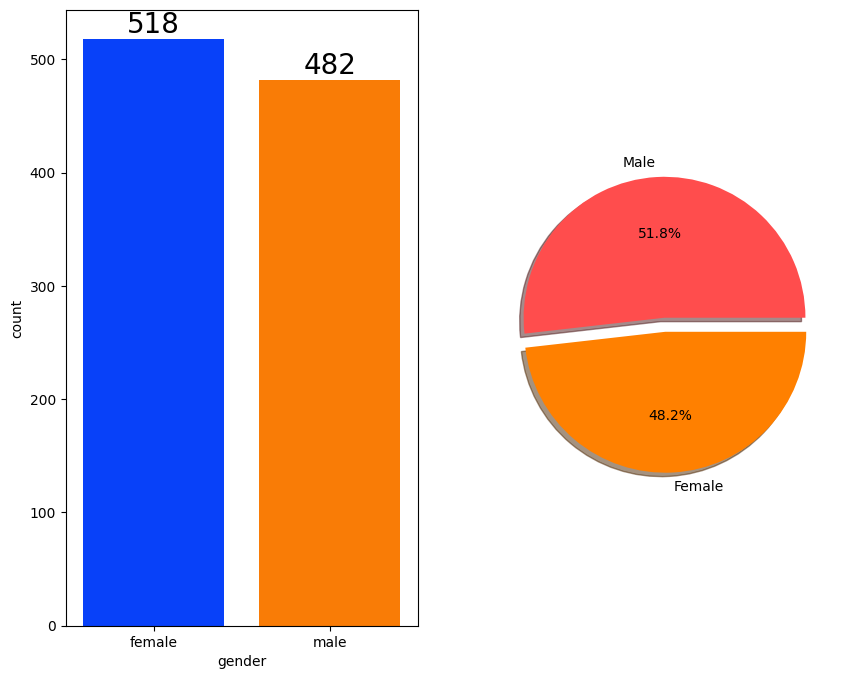

In [67]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


In [68]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837465


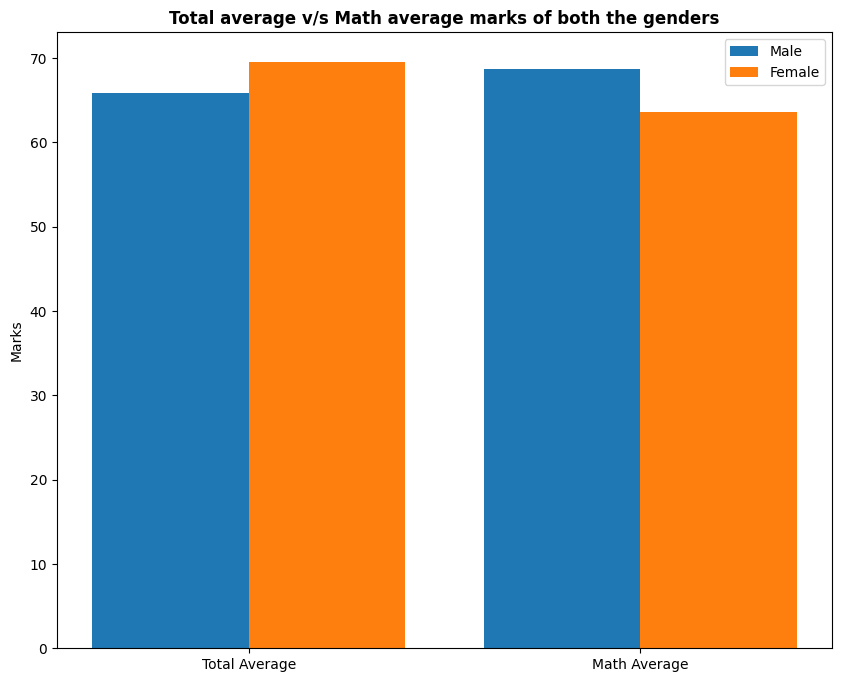

In [71]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights:
- Female have a better Average than men
- Male have better Math scores

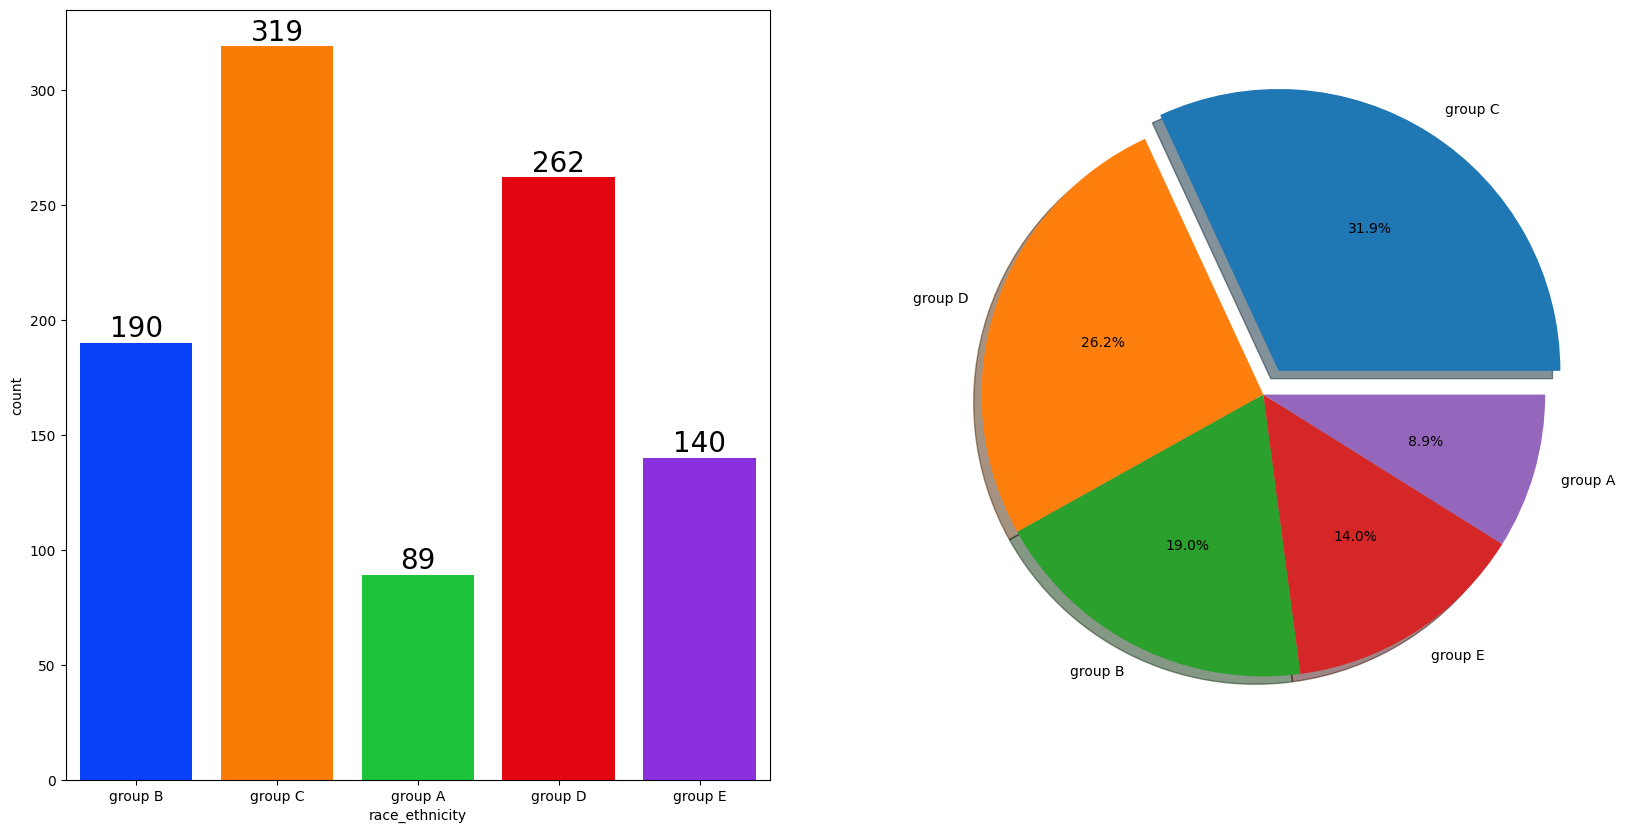

In [74]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Insights:
- Most of students belong to group C and lowest belong to group A

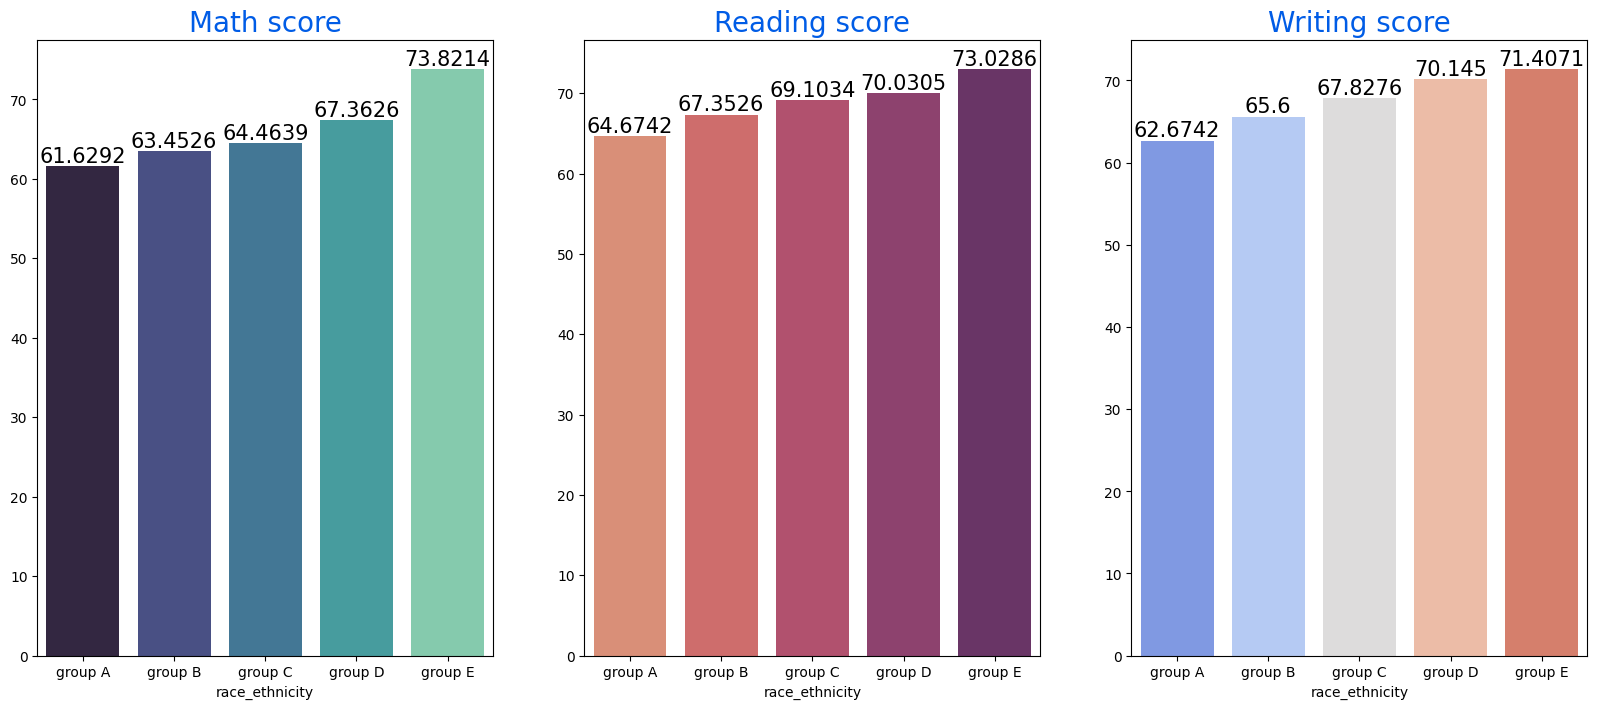

In [76]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- Group E has the highest marks and group A has the lowest.

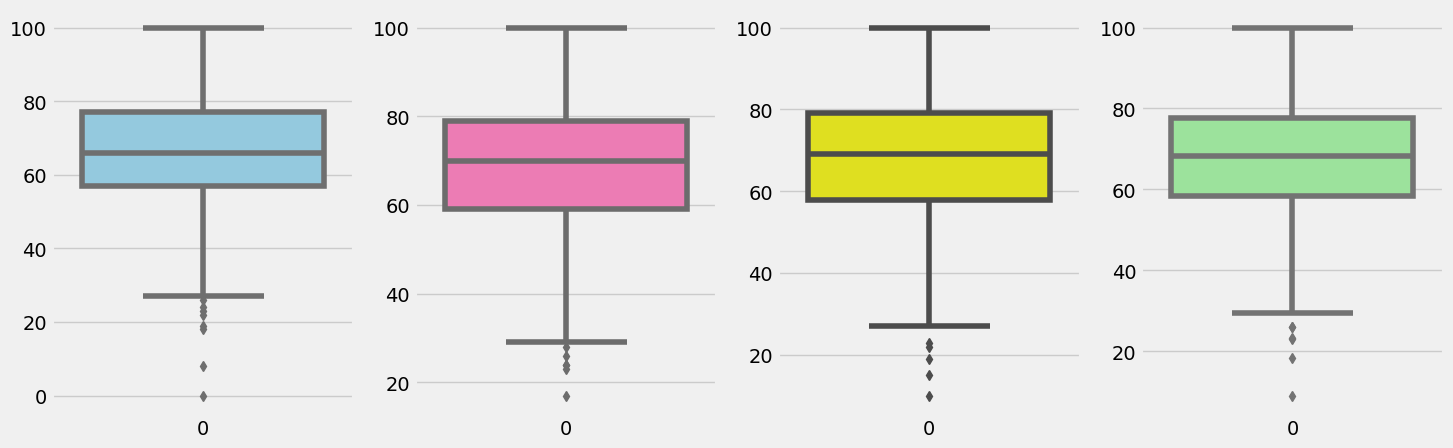

In [80]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

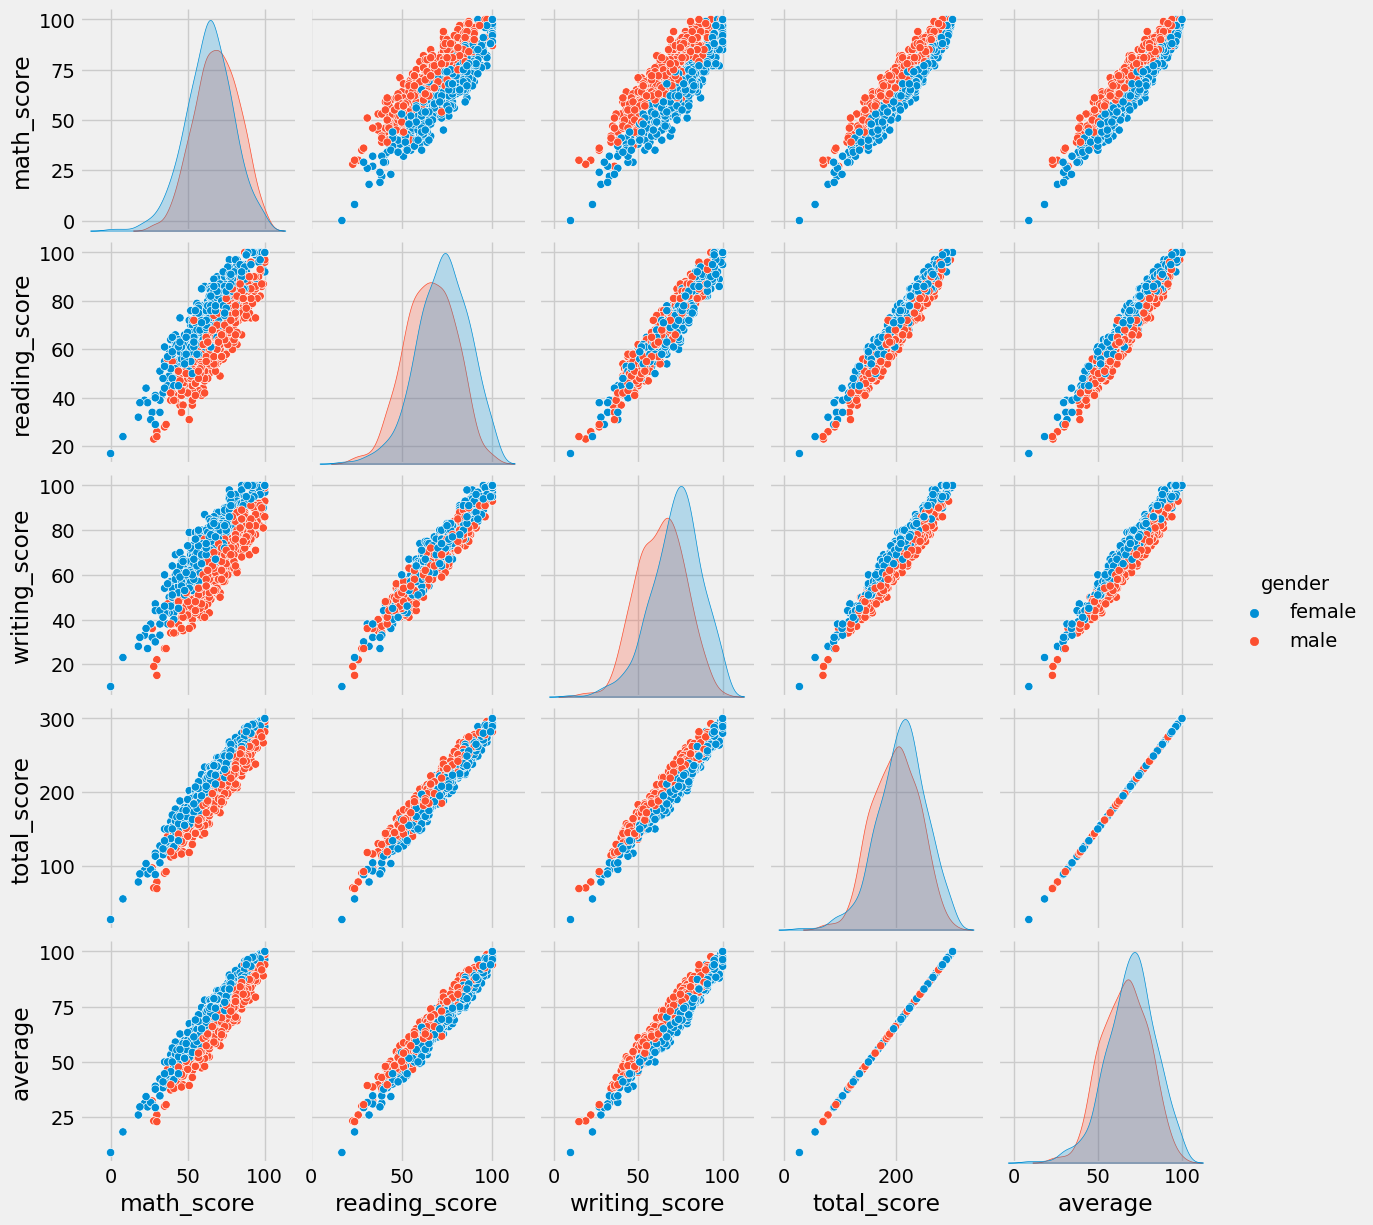

In [81]:
sns.pairplot(df,hue = 'gender')
plt.show()